In [63]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

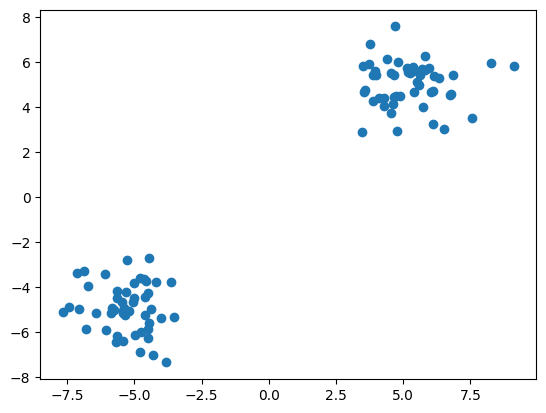

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
import random

In [40]:
class KMeans:
  def __init__(self,n_clusters=2,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None


  def fit_predict(self,X):
    random_idx = random.sample(range(0,X.shape[0]), self.n_clusters)
    self.centroids = X[random_idx]

    for i in range(self.max_iter):
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X,cluster_group)
      if(old_centroids == self.centroids).all():
        break

    return cluster_group

  def assign_clusters(self,X):
    cluster_group = []
    distances = []

    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_distances = min(distances)
      index_pos = distances.index(min_distances)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)


  def move_centroids(self,X,cluster_group):
    new_centroids = []

    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis=0))

    return np.array(new_centroids)

In [53]:
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

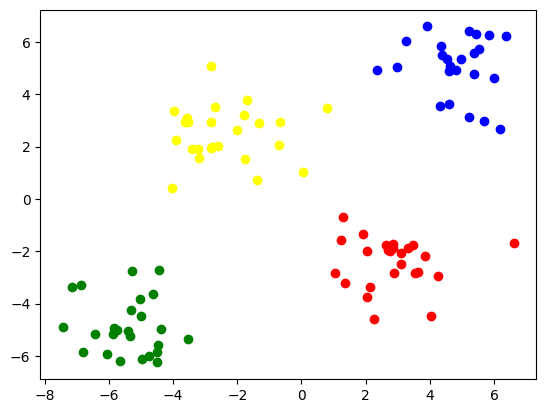

In [60]:
km = KMeans(n_clusters=4,max_iter=100)

y_means = km.fit_predict(X)

plt.scatter(X[y_means ==0,0], X[y_means == 0,1], color='red')
plt.scatter(X[y_means ==1,0], X[y_means == 1,1], color='blue')
plt.scatter(X[y_means ==2,0], X[y_means == 2,1], color='green')
plt.scatter(X[y_means ==3,0], X[y_means == 3,1], color='yellow')
plt.show()

In [66]:
df = pd.read_csv("/content/student_clustering.csv")

In [67]:
X = df.iloc[:,:].values

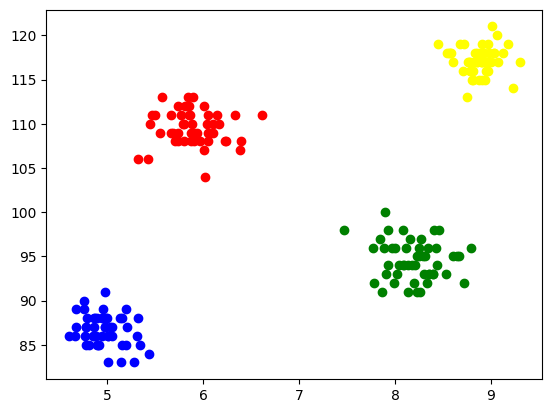

In [82]:
km = KMeans(n_clusters=4,max_iter=550)

y_means = km.fit_predict(X)

plt.scatter(X[y_means ==0,0], X[y_means == 0,1], color='red')
plt.scatter(X[y_means ==1,0], X[y_means == 1,1], color='blue')
plt.scatter(X[y_means ==2,0], X[y_means == 2,1], color='green')
plt.scatter(X[y_means ==3,0], X[y_means == 3,1], color='yellow')
plt.show()